In [1]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/data.csv')

# Состав данных

### Размерность

In [3]:
df.shape

(5769, 20)

In [4]:
df_isnull = ((df.shape[0] - df.isnull().sum()) * 100 / df.shape[0]).reset_index()
df_isnull.columns = ['column_name', 'filled, %']

In [5]:
df_desc = pd.read_csv('./data/data_description.csv')

In [6]:
pd.merge(df_desc, df_isnull, on='column_name', how='inner')

,column_name,description,"filled, %"
0,type,Тип кинематографа,100.000000
1,title_ru,Название на русском,100.000000
2,title_eng,Название на английском,84.538048
3,description,Текстовое описание,100.000000
4,year_start,Дата выхода,99.947998
5,year_end,Дата окончания,0.000000
6,genres,Жанры,99.861328
7,myshows_rating,Рейтинг на MyShows,91.350321
8,myshows_num,Количество оценок на MyShows,91.350321
9,kp_rating,Рейтинг на Kinopoisk,100.000000


### Жанры

In [7]:
GENRES = {}

for genres_row, count in zip(tqdm(df.genres.value_counts().index), df.genres.value_counts().tolist()):
    genres = genres_row.split(',')
    
    for genre in genres:
        try:
            GENRES[genre]
        except KeyError:
            GENRES[genre] = 0
        GENRES[genre] += count

100%|██████████| 1276/1276 [00:00<00:00, 254951.02it/s]


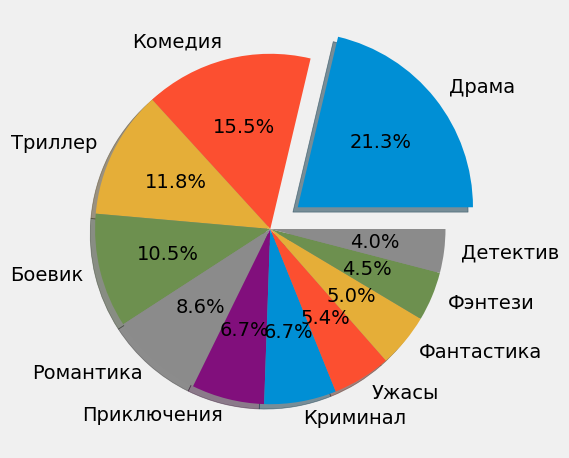

In [8]:
genres_df = pd.DataFrame(GENRES, index=range(1)).T.reset_index()
genres_df = genres_df.rename(columns={'index' : 'genre', 0 : 'count'}).sort_values(by='count', ascending=False).reset_index(drop=True)
genres_df = genres_df.iloc[:11]

y = list(genres_df['count'])
labels = list(genres_df['genre'])
explode = [0.2] + [0 for _ in range(len(y) - 1)]
plt.pie(y, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%', startangle=0)
plt.tight_layout()

### Распределение оценок

In [9]:
df_ratings = df[['kp_rating', 'imdb_rating', 'myshows_rating']].unstack().reset_index()
df_ratings.columns = ['platform', 'id', 'rating']
df_ratings = df_ratings.loc[~df_ratings['rating'].isnull()]
df_ratings['rating'] = df_ratings['rating'].astype('float')

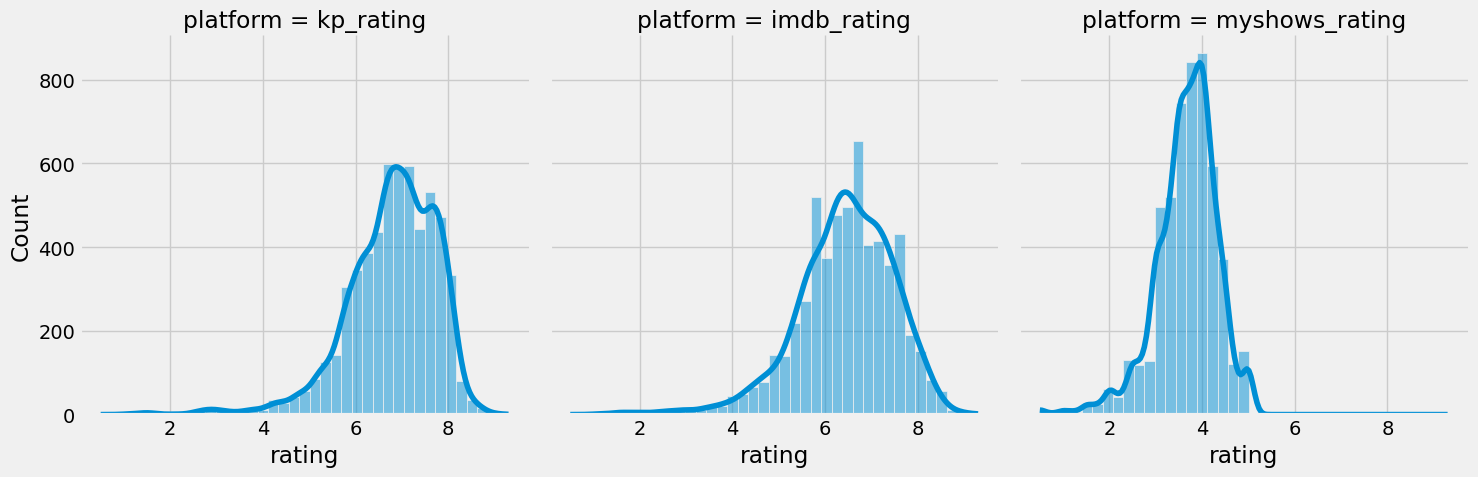

In [10]:
sns.displot(data=df_ratings, x="rating", col="platform", kde=True)
plt.tight_layout()